<a href="https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationDelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preface
##Learn how to learn

In the beginning, computers were invented with an aim to supplement human thinking methods, more specifically, to help us think straight through the midst of complexity. In this series of demonstrations, we provide a journey of mathematical knowledge discovery accompanied with the nurturing of computer skills by the way. In practice, the Mathematics part will include some basic counting principles and statistics, and the Computer part will be some pre-written Python codes for high school students. Through this journey, you may develop you own style of exploration via self-experiment, peer learning, web-searching, etc.

Demonstration materials in this series are by no means designed to be self-contained; but rather, we present some puzzles to guide the audience through a journey of learning. The author hoped audiences would enjoy this journey filling in the remaining details to construct their own knowledge base.

-- YK Tai

*Acknowledgement*

*The author would like to thank Bobby Poon for going through this material, giving feedback and hosting a workshop.*

#4.1 Graph Plotting

Before going into bell shaped distributions, we want to get ourselves familiar with three packages:  **Matplotlib**, **Numpy**, and **Scipy**.

For **Matplotlib**, you may want to go through **section (A)** in [the playground notebook](https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/CollaborationDerivatives.ipynb). You may also practise some codes on recursion there.

Then, you may want to learn **Numpy** with an example in **section (B)** under [that same notebook](https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/CollaborationDerivatives.ipynb). You are encouraged to add some printing lines to investigate some basic operations in Numpy.

After that, you may come back to play a game on graph plotting, in which we will experience the interplay of **Scipy**, **Numpy** and **Matplotlib**. (You may challenge yourself to get straight to the game if you feel efficacious to pick up three packages at once.)

**4.1.1** Let's look at the graph of a *function*.

You are given a special function $F(x)$. 

Please note the following properties:

**(I).**   $F(x)$ is *monotonic increasing* from $0$ to $1$ as $x$ increases;

**(II).**   As $x$ tends to infinity, $F(x)$ shall *reach (asymptotically)* the upper bound $1$; 

**(III).**   As $x$ tends to negative infinity, $F(x)$ shall *reach (asymptotically)* the lower bound $0$.

You may run the following code cell for the sketch of $F(x)$. 


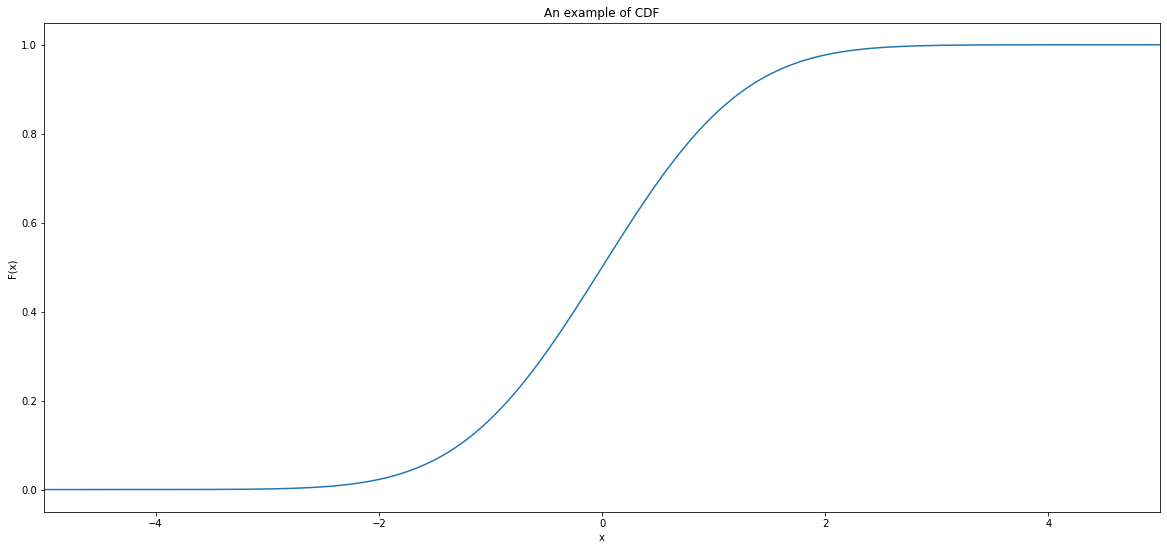

In [13]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 2001) #Highlight from workshop: 2001 would print subarraies of x more neatly 
y = (special.erf(x/np.sqrt(2))+1)/2
#print(len(x))
#print(x.shape)
#print(x[500:1000:10]) 
#print(y[500:1000:10])
#erf is a function of Gauss
#here we could just take special functions for granted


#you may google for more settings of Matplotlib
plt.rcParams["figure.figsize"] = (20,9)
plt.xlim((-5,5))
plt.title("An example of CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.plot(x, y)
plt.show()


**4.1.2** Hands-on lab: Function graph transformation

Now, please insert a scratch cell to amend the code to sketch these variations of $F(x)$: 

$F(x)+1$, $2F(x)$, $F(x/2)$ and $F(x-1)$. 

1.   Could you tell what geometric transformations these variations are corresponding to?
2.   Among horizontal translation, vertical translation, scaling along $x$-axis and scaling along $y$-axis, which of them would preserve properties **(I)**, **(II)** and **(III)** as in 4.1.1?
3.   Composition of transformations preserving **(I)**, **(II)** and **(III)** should also preserves these properties. Could you plot some possible composition?

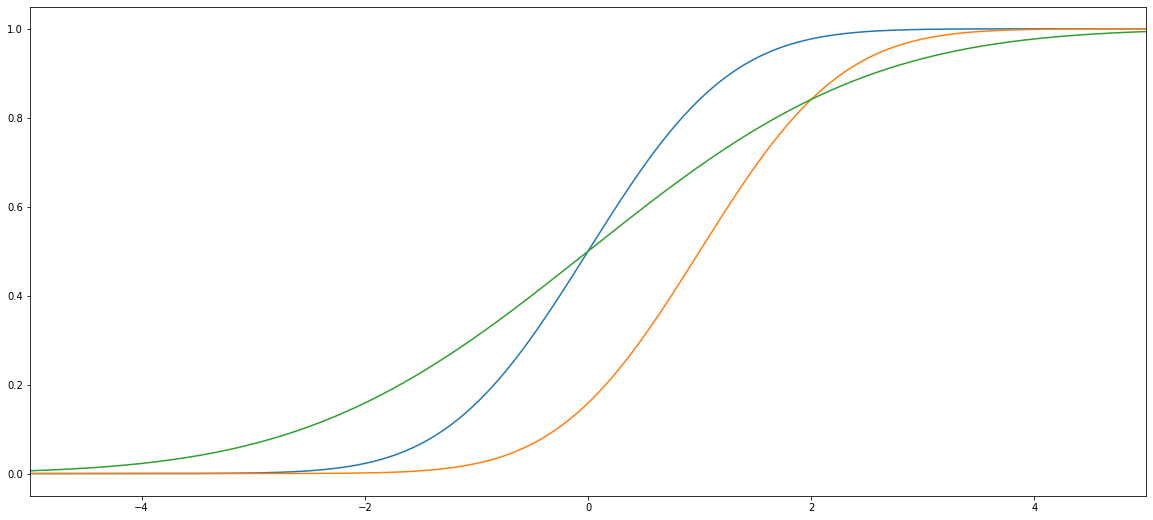

'\nx = np.linspace(-10, 10, 2000)\n\ndef plotReshape(x, move, scale):\n  return (special.erf(((x-move)/scale)/np.sqrt(2))+1)/2\n\nplt.plot(x, plotReshape(x, move=0,scale=1))\nplt.plot(x, plotReshape(x, move=1,scale=1))\nplt.plot(x, plotReshape(x, move=0,scale=2))\nplt.plot(x, plotReshape(x, move=1,scale=2))\nplt.show()\n'

In [14]:
#@title Hints for 4.1.2 Hands on lab.
#@markdown Show code for hints. Comment some lines and run the cell to see which graph correspond to which function

plt.rcParams["figure.figsize"] = (20,9)
plt.xlim((-5,5))
plt.plot(x, y)   #  Graph of y = F(x)
plt.plot(x+1, y) #  Graph of y = F(x-1)
plt.plot(x*2, y) #  Graph of y = F(x/2)
#plt.plot(x, y+1) # Graph of y = F(x)+1
#plt.plot(x, y*2) # Graph of y = 2F(x)
plt.show()

"""
x = np.linspace(-10, 10, 2000)

def plotReshape(x, move, scale):
  return (special.erf(((x-move)/scale)/np.sqrt(2))+1)/2

plt.plot(x, plotReshape(x, move=0,scale=1))
plt.plot(x, plotReshape(x, move=1,scale=1))
plt.plot(x, plotReshape(x, move=0,scale=2))
plt.plot(x, plotReshape(x, move=1,scale=2))
plt.show()
"""

#4.2 Normal Distribution

**4.2.1** So where is the bell shaped distribution?

Theoretically, functions satisfying **(I)**, **(II)** and **(III)** are *Cumulative Distribution Functions (CDFs)* of certain random variables. 

Take our case in 4.1.1 as an example, its function value $F(x)$ indicates the probability (a measure ranges from $0$ to $1$) of an underlying random variable $X$ being less than or equal to $x$, i.e. $F(x)=P(X\leq x)$.

If a CDF is smooth, we may record its slope with the probability density function (pdf).

In particular, the CDF $F(x)$ in 4.1.1 is smooth and its corresponding pdf can be plotted in the code cell below, a very standard bell shaped distribution!!! 

Indeed, it is known as [the standard normal distribution](https://mathworld.wolfram.com/StandardNormalDistribution.html)~


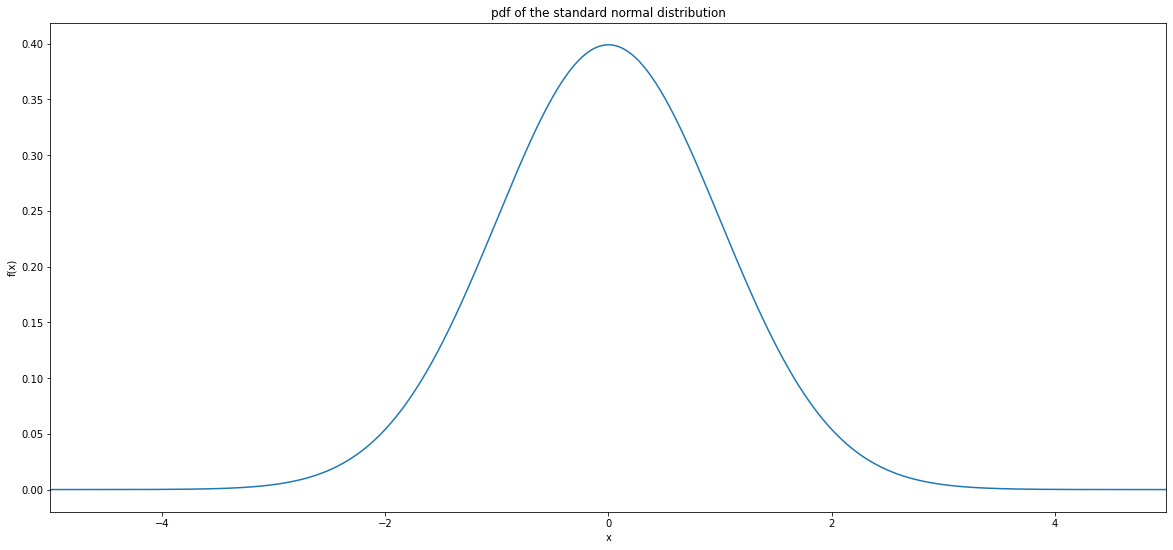

In [15]:
x = np.linspace(-10, 10, 2001)
F = (special.erf(x/np.sqrt(2))+1)/2

#approximate slope by taking numerical derivative
def d(y, dx):
  return np.diff(y)/dx

f = d(F, x[1]-x[0])

plt.rcParams["figure.figsize"] = (20,9)
plt.xlim((-5,5))
plt.title("pdf of the standard normal distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
midpoint = (x[1:]+x[:-1])/2
plt.plot(midpoint, f)
plt.show()

We shall justify in the next notebook DemonstrationEpsilon how *normal* this distribution is.

**Remark:** If a CDF is a step function instead, we may record its steps with the probability mass function (pmf).

Example for the remark: Suppose there is a station operating with $100$ batteries in parallel. After a period of wear and tear, each battery has a chance (a.k.a. probability) of $0.5$ requiring replacement. Assume that each replacement need for each battery is independent. Let $X_{100}$ be the number of batteries that require replacement, then $X_{100}$ is a random variable taking integer value $0$ to $100$, and each chance could be computed by some combinatorics. This is an example of a discrete random variable and the cumulative distribution function, $P(X_{100}\leq x)$, would be a step function.


**4.2.2** But are there more bell shaped distributions?

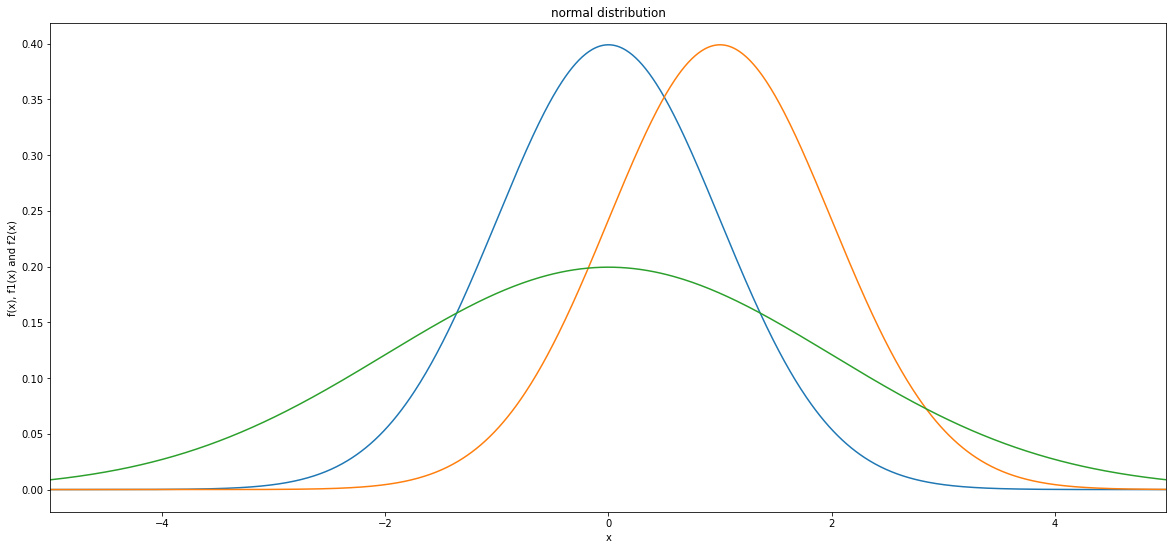

In [16]:
#@title Sure thing.

#@markdown Remember the translation and scaling along the x-axis in 4.1.2?

#@markdown So long as transforms preserve properties (I), (II) and (III), they could be used to transform one CDF to another.

#@markdown We could actually use horizontal translation and scaling to transform CDF of the standard normal distribution to CDF of normal distribution in other positions.

#@markdown Now, taking slopes of transformed CDFs of a normal distribution gives rise to pdfs of normal distribution in other positions. And we have bell shaped distribution again!

#@markdown Audiences interested in coding may check the code and write composition of the two types of transformation for more general positions.

plt.rcParams["figure.figsize"] = (20,9)
plt.title("normal distribution")
plt.xlabel("x")
plt.ylabel("f(x), f1(x) and f2(x)")
plt.xlim((-5,5))

#we only compute with approximation here
f = d(F, x[1]-x[0])
midpoint = (x[:-1] + x[1:])/2
plt.plot(midpoint, f)

x1 = midpoint+1
f1 = d(F, x1[1]-x1[0])
plt.plot(x1, f1)

x2 = midpoint*2
f2 = d(F, x2[1]-x2[0])
plt.plot(x2, f2)

plt.show()

**4.2.3** Hands on lab: First two moments

*Special thanks to Harold Chao for some helpful discussion in this section*

The *moments* of a random variable are good bookkeepings for almost every random variable.

The first moment of a random variable is just the *mean*, also known as the *expected value*. Changes in the first moment correspond to translation of the corresponding pdf (and also the underlying CDF).

The second central moment of a random variable is also known as the *variance*, the square of the *standard deviation*. The second central moment bookkeept how the distribution would spread over. (For the underlying CDF, change of the second order moment corresponds to scaling along the x-axis with the mean as the central position.)

In the code cells, you are given a normally distributed random variable. You may use the slider to specify the mean and variance and plot the CDF and pdf of the random variable by clicking the "run" button :)

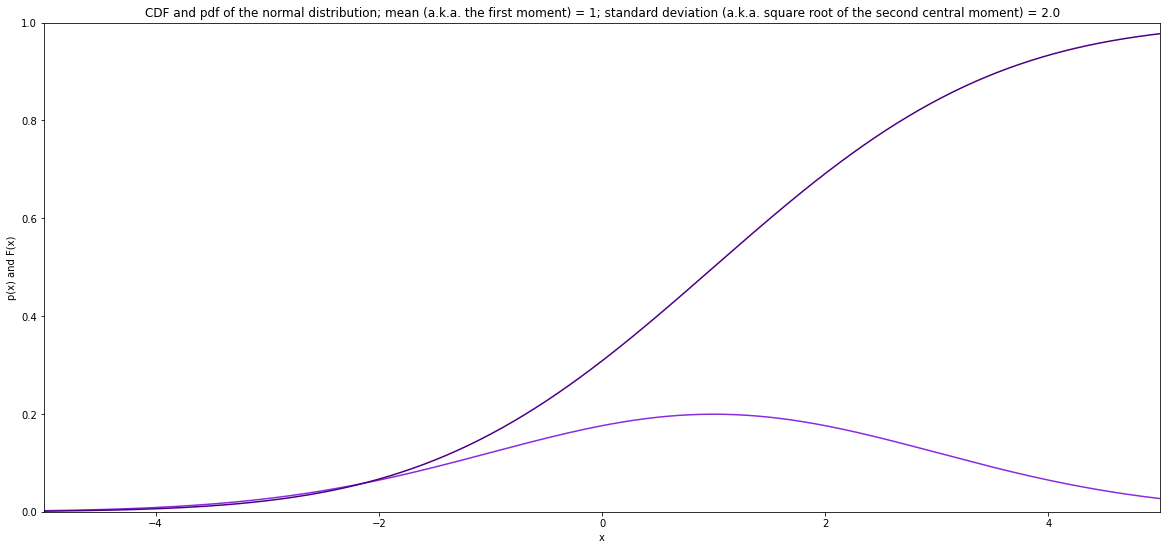

In [17]:
#@title Select values of the mean and the standard deviation with the sliders and run the result

first_moment = 1#@param{type:"slider", max:3, min:-3, step:"0.0001"}
second_central_moment = 4#@param{type:"slider", max:5, min:0, step:"0.0001"}

def normal(x = np.linspace(-100,100,10000),mean = 0,sigma = 0):
  return np.exp(-((x-mean)/sigma)**2/2)/sigma/(np.sqrt(2*np.pi))

x = np.linspace(-100,100,10000)
mu = first_moment
sigma = np.sqrt(second_central_moment)
p = normal(x, mu, sigma)
#approximation by cumulative sum
F = np.cumsum(p)*(x[1]-x[0])

plt.rcParams["figure.figsize"] = (20,9)
plt.xlim((-5,5))
plt.ylim((0,1))
plt.title("CDF and pdf of the normal distribution; mean (a.k.a. the first moment) = {}; standard deviation (a.k.a. square root of the second central moment) = {}".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("p(x) and F(x)")
plt.plot(x, p, c="blueviolet")
plt.plot(x+0.5*(x[1]-x[0]), F, c="indigo")
plt.show()


Could you tell which is which? Comment some code if you only want to see one of them.

*More Hands-on:*

Workshop host please help with some terminology here.

Let $X$ be a random variable with pdf being some specified normal(x, mu, sigma), you may attempt the following:
1.  Write your own code to compute $\mu = E[X]$
2.  Write your own code to compute $\sigma = \sqrt{E[(X-\mu)^2]}$
3.  Try to rewrite the plotting code of normal(x, mu, sigma) by taking slopes of some transformation of the erf function.


In [12]:
#@title sample code
"""
mean = np.dot(p, x)*(x[1]-x[0])
print(mean)
varience = np.dot(p, (x-mean)**2)*(x[1]-x[0])
sd = np.sqrt(varience)
print(varience)
print(sd)

def plotNormal(x, mu, sigma):
  Lx = (x-mu)/sigma
  F = (special.erf(Lx/np.sqrt(2))+1)/2
  dx = x[1]-x[0]
  #approximation of slope
  p = np.diff(F)/dx
  plt.rcParams["figure.figsize"] = (20,9)
  plt.xlim((-5,5))
  plt.ylim((0,1))
  plt.title("(xs-mu)/sigma is the standard nomral distribution")
  plt.xlabel("x")
  plt.ylabel("p(x) and F(x)")
  plt.plot(x, F)
  midpoint = (x[1:]+x[0:-1])/2
  plt.plot(midpoint, p)
  plt.show()

plotNormal(x = np.linspace(-100, 100, 10000), mu = 1, sigma = 2)
#Another workshop: further discussion in cumulative sum and slope may lead to a study on the Fundamental Theorem of Calculus
"""

'\nmean = np.dot(p, x)*(x[1]-x[0])\nprint(mean)\nvarience = np.dot(p, (x-mean)**2)*(x[1]-x[0])\nsd = np.sqrt(varience)\nprint(varience)\nprint(sd)\n\ndef plotNormal(x, mu, sigma):\n  Lx = (x-mu)/sigma\n  F = (special.erf(Lx/np.sqrt(2))+1)/2\n  dx = x[1]-x[0]\n  #approximation of slope\n  p = np.diff(F)/dx\n  plt.rcParams["figure.figsize"] = (20,9)\n  plt.xlim((-5,5))\n  plt.ylim((0,1))\n  plt.title("(xs-mu)/sigma is the standard nomral distribution")\n  plt.xlabel("x")\n  plt.ylabel("p(x) and F(x)")\n  plt.plot(x, F)\n  midpoint = (x[1:]+x[0:-1])/2\n  plt.plot(midpoint, p)\n  plt.show()\n\nplotNormal(x = np.linspace(-100, 100, 10000), mu = 1, sigma = 2)\n#Another workshop: further discussion in cumulative sum and slope may lead to a study on the Fundamental Theorem of Calculus\n'

#Next Episode: Putting Pieces Together (coming soon) 

##Binomial Distribution, Normal Distribution and the story of Central Limited Theorem

Does the above have anything to do with the combinatorics we see in previous demonstration? 

Yes, sure. We will go back to binomial distribution and see how it is related to the normal distribution next time. 

Interested audiences may take it as a project and investigate yourselves.
